## The Analysis and Prediction of Titanic Dataset

### 数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import linear_model

In [22]:
data_train = pd.read_csv("D:/kaggle/Titanic/train.csv") #训练集
data_test = pd.read_csv("D:/kaggle/Titanic/test.csv")  #测试集
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### 可以看出，训练集的Age和Cabin特征值是有缺失的，测试集的Age、Cabin和Fare特征值有缺失，后续应该进行填充

PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

#### 对测试集进行分析：

In [5]:
data_train.Survived.value_counts() #查看幸存和死亡的人数，1表示幸存，0表示死亡

0    549
1    342
Name: Survived, dtype: int64

乘客等级的人数分布情况

Text(0.5, 1.0, '乘客等级人数分布')

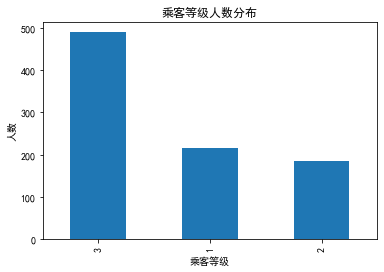

In [6]:
data_train.Pclass.value_counts().plot(kind='bar')
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.title('乘客等级人数分布')   #可以发3等舱的人数最多

登船港口的人数分布情况

Text(0.5, 1.0, '登船港口人数分布')

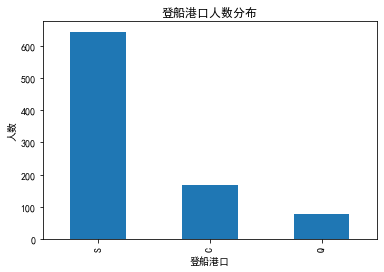

In [7]:
data_train.Embarked.value_counts().plot(kind='bar')
plt.xlabel('登船港口')
plt.ylabel('人数')
plt.title('登船港口人数分布')

#### 分析各个特征与幸存与否的关系：

乘客等级与幸存概率的关系，可以发现1等舱的幸存概率更大

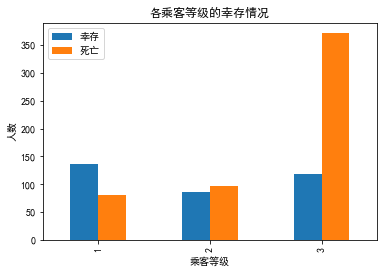

In [9]:
Survive_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survive_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df = pd.DataFrame({'幸存':Survive_1, '死亡':Survive_0})
df.plot.bar()
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.title('各乘客等级的幸存情况')
plt.legend()

性别与幸存概率的关系，显然女性的幸存概率更高

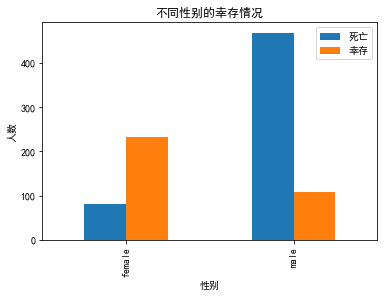

In [11]:
Survived_0= data_train.Sex[data_train.Survived == 0].value_counts()
Survived_1= data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'死亡':Survived_0, '幸存':Survived_1})
df.plot.bar()
plt.xlabel('性别')
plt.ylabel('人数')
plt.title('不同性别的幸存情况')
plt.legend()

年龄与幸存情况的关系，因为年龄的取值比较多，所以这里采用密度曲线来展示

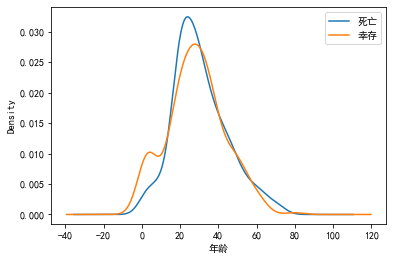

In [12]:
data_train.Age[data_train.Survived==0].plot.density(label='死亡')
data_train.Age[data_train.Survived==1].plot.density(label='幸存')
plt.xlabel('年龄')
plt.legend()

登船港口与幸存概率的关系，看起来关系好像不大

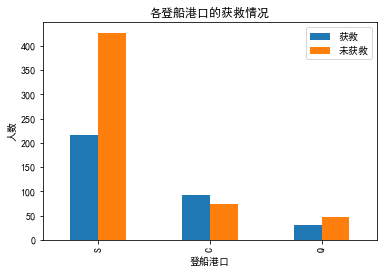

In [13]:
Survive_0 = data_train.Embarked[data_train.Survived==0].value_counts()
Survive_1 = data_train.Embarked[data_train.Survived==1].value_counts()
df = pd.DataFrame({'获救':Survive_1, '未获救':Survive_0})
df.plot.bar()
plt.xlabel('登船港口')
plt.ylabel('人数')
plt.title('各登船港口的获救情况')
plt.legend()

由于乘客的Cabin值缺失太多，且值基本上都是不同的，所以这里选择是否有Cabin信息作为特征，看看其与幸存概率的关系

1表示获救，0表示未获救，可以看出有Cabin信息的乘客中获救的概率更大

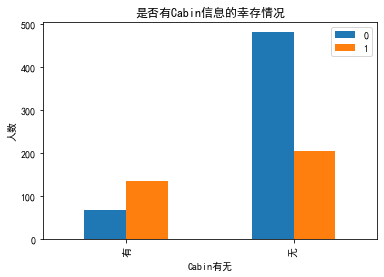

In [16]:
Survived_cabin = data_train.Survived[data_train.Cabin.notnull()].value_counts()
Survived_nocabin = data_train.Survived[data_train.Cabin.isnull()].value_counts()
df=pd.DataFrame({'有':Survived_cabin, '无':Survived_nocabin}).transpose()
df.plot.bar()
plt.title("是否有Cabin信息的幸存情况")
plt.xlabel("Cabin有无") 
plt.ylabel("人数")
plt.legend()

### 数据处理

#### 填充缺失值

In [23]:
data_train.Age.isnull().value_counts() #查看Age缺失值的个数

False    714
True     177
Name: Age, dtype: int64

In [24]:
data_train.Age.describe() #查看Age的数据特征

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
age_lack = np.random.randint(20, 38, 177) #采用25%分位数和75%分位数中间的随机值来填充Age的缺失值
data_train.Age[data_train.Age.isnull()] = age_lack
data_train.Age.isnull().value_counts()  #已经填充完毕

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    891
Name: Age, dtype: int64

In [27]:
#将不是数值型的数据编码为数值型
#pd的DataFrame中Embarked类型为object,应先转化为string类型再进行编码
data_train["Embarked"] = LabelEncoder().fit_transform(data_train["Embarked"].astype(str)) 
data_train["Sex"] = LabelEncoder().fit_transform(data_train["Sex"].astype(str)) 
#对于Cabin特征，将有Cabin信息的标记为1，没有标记信息的标记为0
data_train.loc[data_train.Cabin.notnull(), 'Cabin' ] = 1
data_train.loc[data_train.Cabin.isnull(), 'Cabin' ] = 0
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,32.0,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0


#### 特征筛选

每个人的Name特征和Ticket编号都是不一样的，感觉应该和幸存概率关系不大，所以并未使用这两个特征。

不过也有人说Name的称呼，比如Mr，Miss，Mrs的不同意味着社会地位的不同，这可能会对幸存概率造成影响，但本程序并未分析。

In [28]:
train = data_train.drop(columns=['Name', 'Ticket'])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,2
4,5,0,3,1,35.0,0,0,8.0500,0,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,2
887,888,1,1,0,19.0,0,0,30.0000,1,2
888,889,0,3,0,32.0,1,2,23.4500,0,2
889,890,1,1,1,26.0,0,0,30.0000,1,0


#### 数据标准化

看到Fare特征的值变化比较大，所以对其进行归一化

In [29]:
train['Fare'] = MinMaxScaler().fit_transform(train[['Fare']]) #输入一定要是2维的
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,0.014151,0,2
1,2,1,1,0,38.0,1,0,0.139136,1,0
2,3,1,3,0,26.0,0,0,0.015469,0,2
3,4,1,1,0,35.0,1,0,0.103644,1,2
4,5,0,3,1,35.0,0,0,0.015713,0,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,0.025374,0,2
887,888,1,1,0,19.0,0,0,0.058556,1,2
888,889,0,3,0,32.0,1,2,0.045771,0,2
889,890,1,1,1,26.0,0,0,0.058556,1,0


#### 对测试集进行同样的操作

In [30]:
test = data_test.drop(columns=['Name', 'Ticket'])
test.Age.isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [31]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [32]:
age_lack_test = np.random.randint(21, 39, 86)
test.Age[test.Age.isnull()] = age_lack_test
test.Age.isnull().value_counts()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    418
Name: Age, dtype: int64

In [34]:
test["Embarked"] = LabelEncoder().fit_transform(test["Embarked"].astype(str)) 
test["Sex"] = LabelEncoder().fit_transform(test["Sex"].astype(str)) 
test.loc[test.Cabin.notnull(), 'Cabin' ] = 1
test.loc[test.Cabin.isnull(), 'Cabin' ] = 0
test['Fare'] = MinMaxScaler().fit_transform(test[['Fare']])
test = test.fillna(value=test.Fare.mean())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          418 non-null int64
Embarked       418 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 26.2 KB


In [43]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,0.015282,1,1
1,893,3,0,47.0,1,0,0.013663,1,2
2,894,2,1,62.0,0,0,0.018909,1,1
3,895,3,1,27.0,0,0,0.016908,1,2
4,896,3,0,22.0,1,1,0.023984,1,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,33.0,0,0,0.015713,1,2
414,1306,1,0,39.0,0,0,0.212559,1,0
415,1307,3,1,38.5,0,0,0.014151,1,2
416,1308,3,1,31.0,0,0,0.015713,1,2


### 训练

用sklearn库中的LogisticRegression()模型进行训练

In [68]:
train_np = train.values

# label，是否幸存
y = train_np[:, 1]
# features，特征值
X = train_np[:, 2:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
clf.coef_

D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.81075291, -2.65398869, -0.03522329, -0.30045748, -0.06759888,
         0.        ,  0.75317682, -0.19339715]])

### 预测

In [62]:
test_np = test.values[:, 1:]
predictions = clf.predict(test_np)

### 生成CSV文件

In [64]:
result = pd.DataFrame({'PassengerId':test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("submit_Titanic.csv", index=False)

In [65]:
pd.read_csv("submit_Titanic.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 到这里为止，生成的预测文件在kaggle上评分0.76794

#### 感觉评分低的原因还是数据挖掘不到位，因为水平有限，所以不打算继续分析了。

#### 一些可能的优化操作：

* Age属性缺失值的填充，根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，将其分为前面的字母部分和后面的数字部分，应该反映了房间所在的位置，靠近甲板的幸存概率更大？
* Name是一个没有触碰的属性，可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。